## Observations and Insights 

In [48]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")


# Display the data table for preview
df = merge_df
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df.loc[df.duplicated(['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_mouse = df[df['Mouse ID']=='g989']
dropped_mouse.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop(df[df['Mouse ID']=='g989'].index)
df1 = clean_df
df1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(df1['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen


# This method is the most straighforward, creating multiple series 
# and putting them all together at the end.



In [124]:
####################
# New Data Frame grouped by Drug Regimen
g_df1 = df1.groupby(['Drug Regimen'])

# Generate Sumamry Stats
mean = g_df1['Tumor Volume (mm3)'].mean()
median = g_df1['Tumor Volume (mm3)'].median()
var = g_df1['Tumor Volume (mm3)'].var()
std = g_df1['Tumor Volume (mm3)'].std()
sem = g_df1['Tumor Volume (mm3)'].sem()

# Make Summary Table
summary_table = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": var,
                            "Tumor Volume Std. Dev.": std,
                            "Tumor Volume Std. Err.": sem})
summary_table


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [125]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

##########
# Generate summary table with on function 
df4 = df.loc[:,['Drug Regimen', 'Tumor Volume (mm3)']]
df4 = df4.groupby(['Drug Regimen']).agg(['mean','median', 'var', 'std', 'sem'])
df4

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 




Text(0, 0.5, 'Number of Mice for Each Treatment')

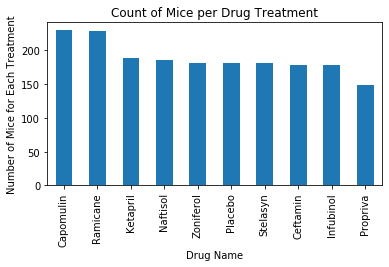

In [136]:
############
## Bar Chart using Pandas
# Set X axis values
x_axis1 = df1['Drug Regimen'].value_counts()

# Set Y axis values
y_axis = g_df1['Tumor Volume (mm3)'].count()
y_axis

# Plot X and Y axis
x_axis1.plot(kind="bar", figsize=(6,3), align="center", width=0.5)

# Set a title and labels for the chart
plt.title("Count of Mice per Drug Treatment")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice for Each Treatment")

## Set limits for chart
# # Set x and y limits
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(y_axis)+10)

In [127]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.



Text(0, 0.5, 'Number of Mice for Each Treatment')

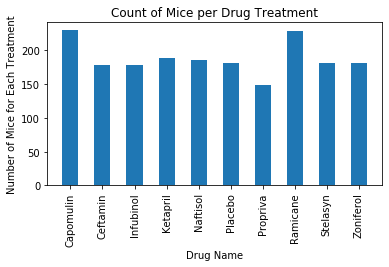

In [134]:
##################
# Bar Chart Using Matplotlib
# Create a list indicating where to write x labels and set figure size to adjust for space
x_axis = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol',
          'Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']

tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,3))
plt.bar(x_axis, y_axis, alpha=1.0, align="center", width=0.5)
plt.xticks(tick_locations, x_axis, rotation="vertical")
plt.show

# Set a Title and labels
plt.title("Count of Mice per Drug Treatment")
plt.xlabel("Drug Name")
plt.ylabel("Number of Mice for Each Treatment")

## Set limits for chart
# # Set x and y limits
# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(y_axis)+10)


In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Text(0, 0.5, 'Sex')

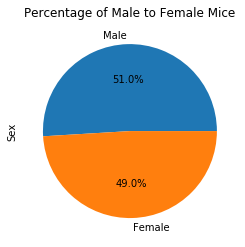

In [146]:
##################
# Pie Chart Using Pandas
sex_df = df1['Sex'].value_counts()
sex_df.plot(kind = 'pie', autopct = '%1.1f%%')

# Set a title and labels
plt.title('Percentage of Male to Female Mice')
plt.ylabel("Sex")

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Text(0, 0.5, 'Sex')

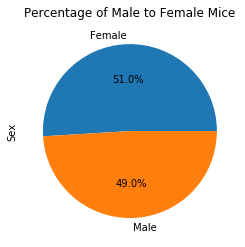

In [145]:
##################
# Pie Chart Using Matplotlib

# Plot Labels
labels = ["Female", "Male"]

# Plot values
values = gender_p

# Plot using Matplotlib
plt.pie(sex_df, labels=labels, autopct="%1.1f%%")

# Set a title and labels
plt.title('Percentage of Male to Female Mice')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor 
# volume at the last timepoint


In [263]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
regimen_df = df1['Drug Regimen'].isin(treatments)
tumor_vol_df = df1[regimen_df]
tumor_vol_df
last_tp = tumor_vol_df.drop_duplicates(subset = 'Mouse ID', keep = 'last')


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = last_tp.loc[last_tp['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    low_q = quartiles[0.25]
    up_q = quartiles[0.75]
    iqr = up_q - low_q
    low_bound = low_q - (1.5 * iqr)
    up_bound = up_q + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < low_bound) | (final_tumor_vol > up_bound)]
    print(f"\n{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers: 669    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [22]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [15]:
# Generate a box plot of the final tumor volume of each mouse
# across four regimens of interest


Text(0.5, 17.200000000000003, 'Treatment Type')

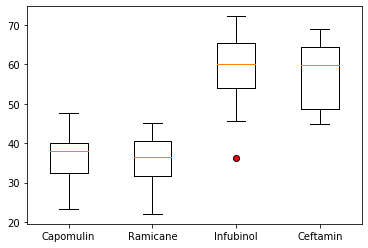

In [264]:
# Set outliers mark
red_o = dict(markerfacecolor='r', marker='o')

# Make Box and Whisker Plot
fig1, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels= treatments, flierprops=red_o)

# Set a title and labels
ax1.set_title('Final Tumor Volume by Treatment Type')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Treatment Type')


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


Text(0, 0.5, 'Tumor Volume (mm3)')

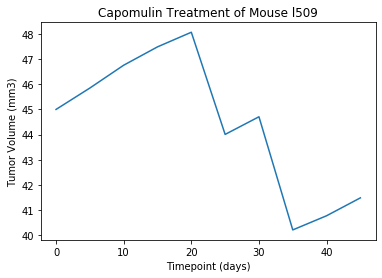

In [148]:
##############
# Gather data for just Capomuloin

Capomulin = df1[df1['Drug Regimen']=='Capomulin']

# Group by mean
Cap_Mouse = Capomulin.groupby(['Mouse ID']).mean()
Cap_Mouse

# Select a mouse
mouse = df1[df1['Mouse ID']=='l509']
mouse

# Set X and Y values for plot
mouse_x = mouse['Timepoint']
mouse_y = mouse['Tumor Volume (mm3)']

# Plot X and Y values
plt.plot(mouse_x, mouse_y)

# Add title and add labels to X and Y axes
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


Text(0, 0.5, 'Average Tumor Volume (mm3)')

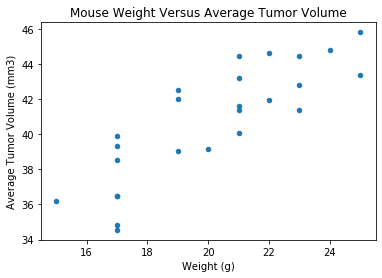

In [34]:
##############
# Scatter plot of Capomulin Mice
Cap_Mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)')

# Add labels to X and Y axes :: Add title
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor 
# volume for the Capomulin regimen




In [149]:
# Calculate Pearson's R/the correlation coefficient
weight = Cap_Mouse.loc[:,'Weight (g)']
tumor = Cap_Mouse.loc[:,'Tumor Volume (mm3)']
correlation = st.pearsonr(weight,tumor)
correlation
print(f"The correlation between weight and the average tumor volume is {round(correlation[0],2)}.")

The correlation between weight and the average tumor volume is 0.84.


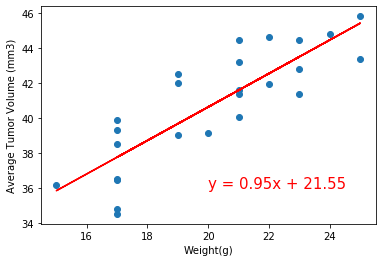

In [150]:
# Calculate the linear regression model for mouse weight and 
# average tumor volume for the Capomulin regimen

x_values = weight
y_values = tumor
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36), fontsize=15,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()